In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## input
df = pd.read_csv("data/train.csv")

## mapping strings to numbers
df["Sex"] = df["Sex"].replace({"male":0, "female":1})
df["Embarked"] = df["Embarked"].replace({'C':0, 'S':1, 'Q':2})

## handling names
title_dict = {"Mr.":0, "Mrs.":1, "Miss.":2, "Master.":3, "Dr.":4}
for i_row, row in df.iterrows():
    if isinstance(row["Name"], int):
        break
    title = row["Name"].split()[1]
    if title in title_dict.keys():
        df.loc[i_row,"Name"] = title_dict[title]
    else:
        df.loc[i_row,"Name"] = 5
        
## handling nans
df = df.drop(columns=["Cabin"])
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().iloc[0])

## creating input and output dataframes
yf = df["Survived"]
Xf = df.drop(columns=["PassengerId", "Survived", "Ticket"])

## normalizing
features = ["Age", "Fare"]
Xf[features] = (Xf[features] - Xf[features].mean()) / Xf[features].std()
print(Xf.head())

   Pclass  Name  Sex       Age  SibSp  Parch      Fare  Embarked
0       3     0    0 -0.565419      1      0 -0.502163       1.0
1       1     1    1  0.663488      1      0  0.786404       0.0
2       3     2    1 -0.258192      0      0 -0.488580       1.0
3       1     1    1  0.433068      1      0  0.420494       1.0
4       3     0    0  0.433068      0      0 -0.486064       1.0


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

frac_train = 0.8
m, n = Xf.shape
m1_arr = np.arange(100, m, 5)
score_train_arr, score_test_arr = [], []
for m1 in m1_arr:
    print("\r{0} out of {1}".format(m1, m), end='\r')
    # randomly choosing samples
    row_sampler = np.random.choice(m, m1, replace=False)
    ynp_m1 = yf.loc[row_sampler].to_numpy()
    Xnp_m1 = Xf.loc[row_sampler, :].to_numpy()
    # splitting into train and test
    m1_train = int(m1 * frac_train)
    ynp_m1_train = ynp_m1[:m1_train]
    Xnp_m1_train = Xnp_m1[:m1_train, :]
    ynp_m1_test = ynp_m1[m1_train:m1]
    Xnp_m1_test = Xnp_m1[m1_train:m1, :]
    # training
    clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
    clf.fit(Xnp_m1_train, ynp_m1_train)
    # evaluating
    score_train_arr.append(f1_score(clf.predict(Xnp_m1_train), ynp_m1_train))
    score_test_arr.append(f1_score(clf.predict(Xnp_m1_test), ynp_m1_test))

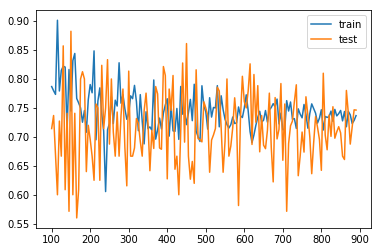

In [39]:
fig, fax = plt.subplots()
fax.plot(m1_arr, score_train_arr, label="train")
fax.plot(m1_arr, score_test_arr, label="test")
plt.legend()
plt.show()